In [2]:
import json
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def load_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data


In [42]:
import matplotlib.pyplot as plt

def plot_histogram_from_dict(data_dict, figsize=(20, 6), title='Histogram from Dictionary'):
    """
    Plots a histogram where keys of the dictionary are the bins
    and the values are the frequencies.

    Parameters:
    data_dict (dict): A dictionary where keys are the bins and values are the frequencies.
    """
    # Extract the keys (bins) and values (frequencies)
    bins = list(data_dict.keys())
    frequencies = list(data_dict.values())

    # Plot histogram
    fig, ax = plt.subplots(figsize=figsize) 
    
    # Set logarithmic scale for y-axis
    plt.bar(bins, frequencies, width=0.8, align='center')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [7]:
data_jsons = load_jsonl('/workdir/results/Qwen2-VL-2B-Instruct_agriculture/Qwen__Qwen2-VL-2B-Instruct/samples_agrivqa_val_agriculture_2024-12-06T17-01-06.568161.jsonl')

In [8]:
data_jsons[0].keys()


dict_keys(['doc_id', 'doc', 'target', 'arguments', 'resps', 'filtered_resps', 'filter', 'metrics', 'doc_hash', 'prompt_hash', 'target_hash', 'acc'])

In [37]:
from collections import defaultdict
data_jsons[0]['doc']['subfield']
subfields = defaultdict(int)
subfields_wrong = defaultdict(int)

In [ ]:
for d in data_jsons:
    subfields[d['doc']['subfield']] +=1
    if d['acc'] == 0:
        subfields[d['doc']['subfield']] +=1

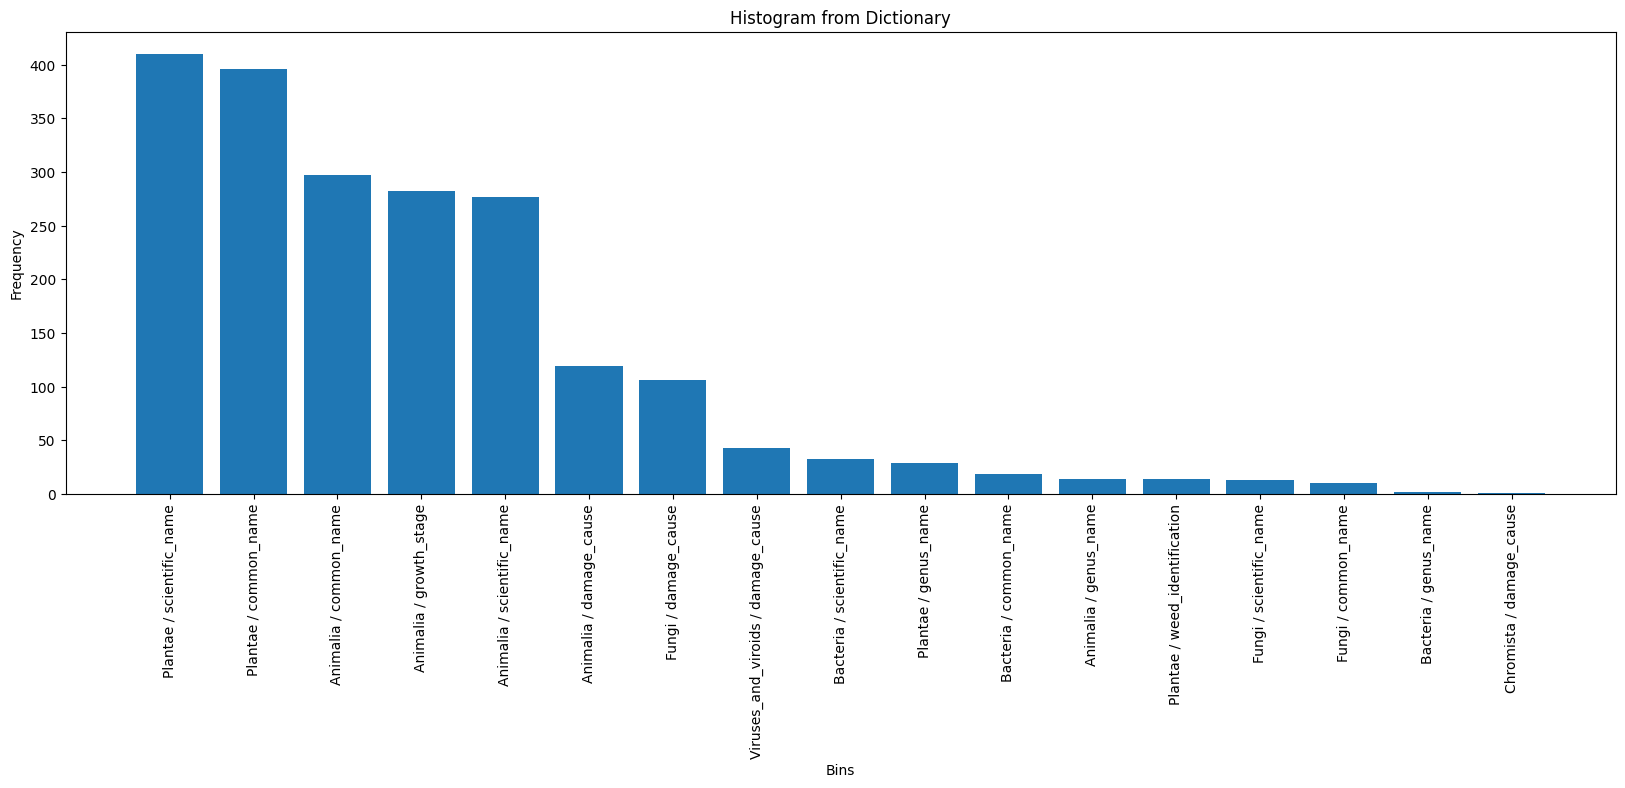

In [47]:
sorted_dict = dict(sorted(subfields.items(), key=lambda item: -item[1]))
plot_histogram_from_dict(sorted_dict)

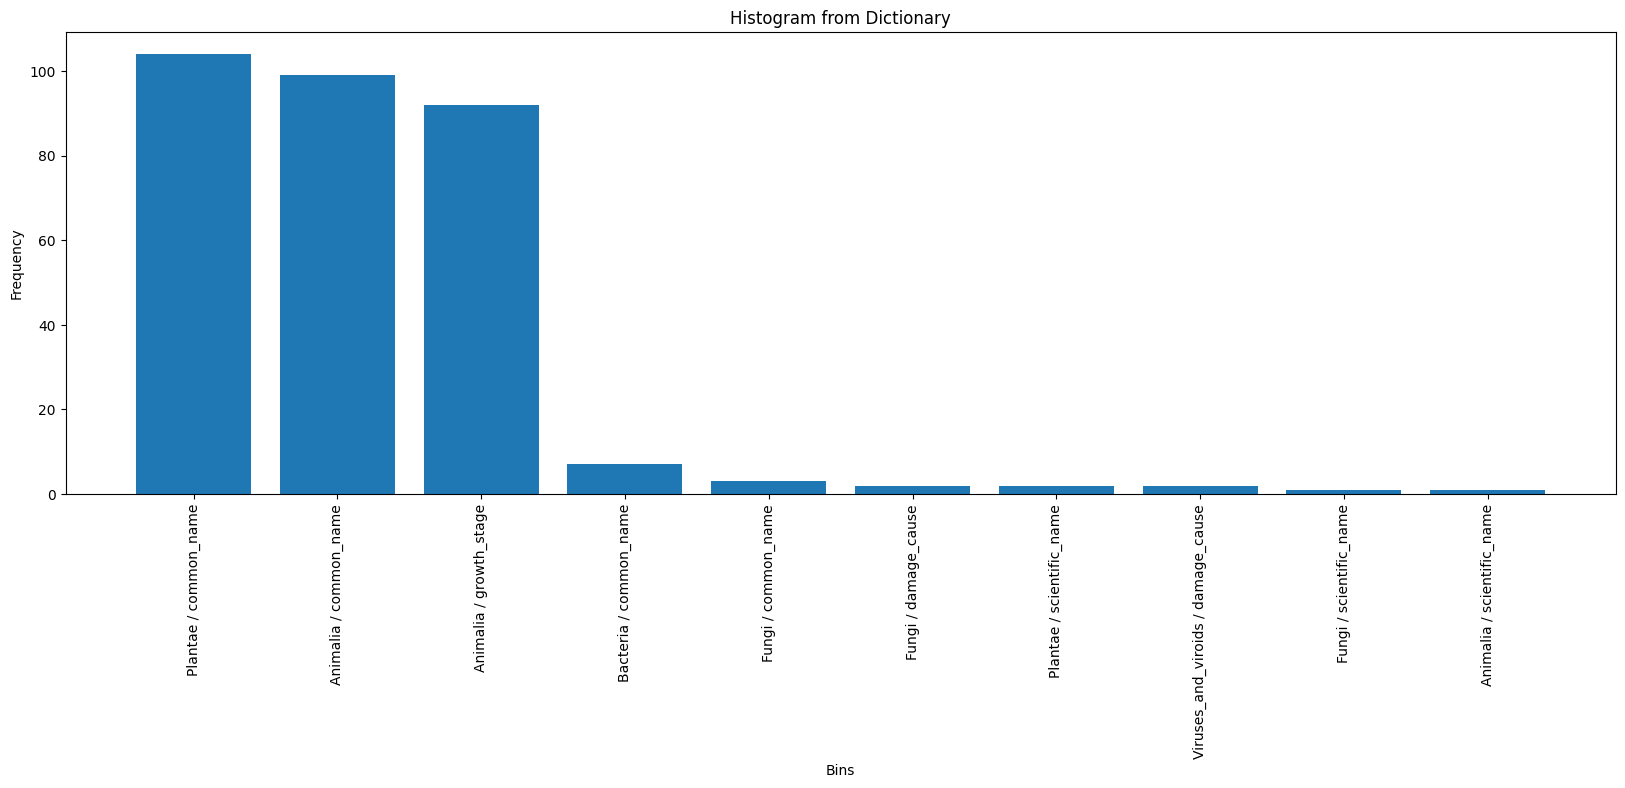

In [48]:

sorted_dict = dict(sorted(subfields_wrong.items(), key=lambda item: -item[1]))
plot_histogram_from_dict(sorted_dict)

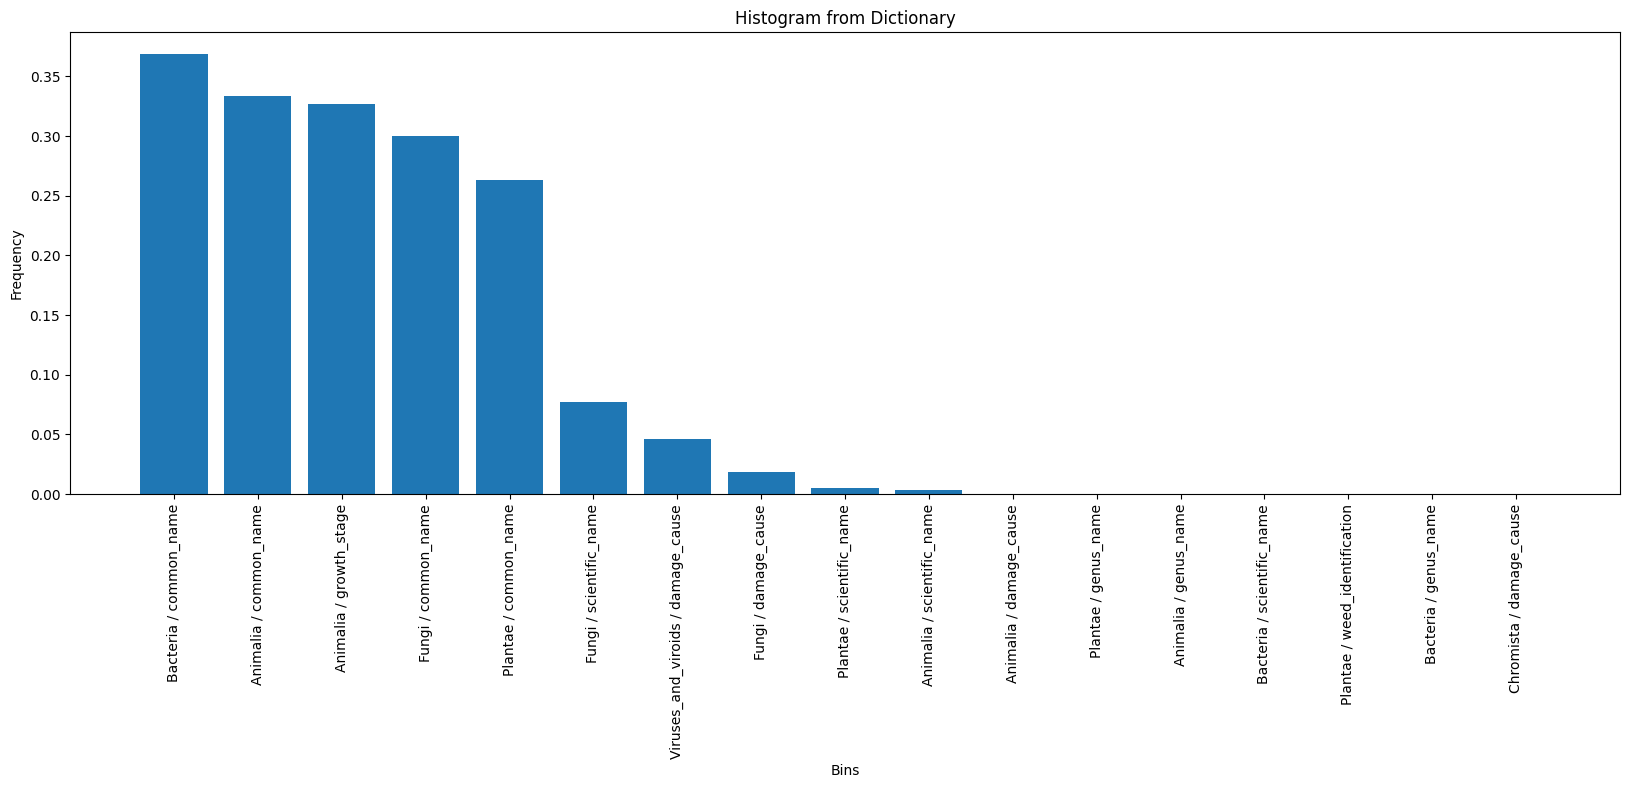

In [50]:
percentage = {key:subfields_wrong[key]/subfields[key] for key in subfields}
sorted_dict = dict(sorted(percentage.items(), key=lambda item: -item[1]))
plot_histogram_from_dict(sorted_dict)

In [51]:
data_jsons[0]

{'doc_id': 0,
 'doc': {'id': 'test__EPPO_1',
  'question': 'What is the common name in English of this plant? <image 1>',
  'options': '[\'maidenhair tree\', \'autumn bugbane\', "martinez\'s spruce", \'montbretia\']',
  'explanation': None,
  'image_1': '<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x682 at 0x7F19240F35C0>',
  'image_2': None,
  'image_3': None,
  'image_4': None,
  'image_5': None,
  'img_type': "['Picture']",
  'answer': 'D',
  'options_difficulty': '1',
  'question_type': 'multiple-choice',
  'subfield': 'Plantae / common_name',
  'metadata': '{"source": "EPPO", "author": "EPPO", "license": "", "url": "https://gd.eppo.int/media/data/taxon/T/TTRCR/pics/1024x0/8275.jpg", "language": "English", "verbose_answer": "{verbose_answer}", "eppo_code": "TTRCR", "gbif_key": "2747939", "kingdom": "Plantae", "tag": "common_name", "common_name_language": "English"}'},
 'target': 'D',
 'arguments': {'gen_args_0': {'arg_0': "<|im_start|>system\nYou are a helpful assista

In [75]:
data_jsons[0]['doc']

{'id': 'test__EPPO_1',
 'question': 'What is the common name in English of this plant? <image 1>',
 'options': '[\'maidenhair tree\', \'autumn bugbane\', "martinez\'s spruce", \'montbretia\']',
 'explanation': None,
 'image_1': '<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x682 at 0x7F19240F35C0>',
 'image_2': None,
 'image_3': None,
 'image_4': None,
 'image_5': None,
 'img_type': "['Picture']",
 'answer': 'D',
 'options_difficulty': '1',
 'question_type': 'multiple-choice',
 'subfield': 'Plantae / common_name',
 'metadata': '{"source": "EPPO", "author": "EPPO", "license": "", "url": "https://gd.eppo.int/media/data/taxon/T/TTRCR/pics/1024x0/8275.jpg", "language": "English", "verbose_answer": "{verbose_answer}", "eppo_code": "TTRCR", "gbif_key": "2747939", "kingdom": "Plantae", "tag": "common_name", "common_name_language": "English"}'}

In [65]:
data_jsons[0]['doc']['options_difficulty']
difficulties = defaultdict(int)
difficulties_wrong = defaultdict(int)

In [70]:
for d in data_jsons:
    #if eval(d['doc']['metadata'])['tag'] != 'growth_stage':
        difficulties[d['doc']['options_difficulty']] +=1
        if d['acc'] == 0:
            difficulties_wrong[d['doc']['options_difficulty']] +=1

In [73]:
difficulties_wrong

defaultdict(int, {'3': 102, '2': 86, '5': 128, '4': 92, '1': 126})

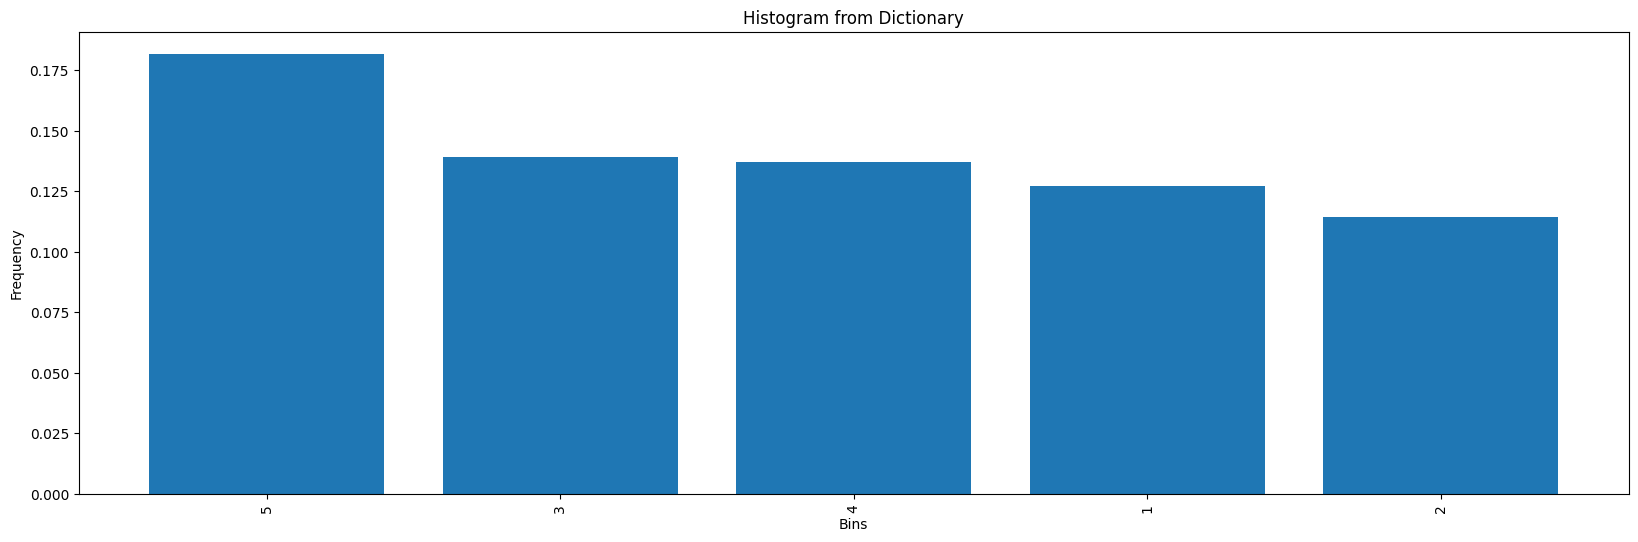

In [74]:
percentage = {key:difficulties_wrong[key]/difficulties[key] for key in difficulties}
sorted_dict = dict(sorted(percentage.items(), key=lambda item: -item[1]))
plot_histogram_from_dict(sorted_dict)

In [32]:
eval(data_jsons[0]['doc']['metadata'])

{'source': 'EPPO',
 'author': 'EPPO',
 'license': '',
 'url': 'https://gd.eppo.int/media/data/taxon/T/TTRCR/pics/1024x0/8275.jpg',
 'language': 'English',
 'verbose_answer': '{verbose_answer}',
 'eppo_code': 'TTRCR',
 'gbif_key': '2747939',
 'kingdom': 'Plantae',
 'tag': 'common_name',
 'common_name_language': 'English'}

In [28]:
c=0
for d in data_jsons:
    if d['acc'] == 0:
        c+=1
        print(f'Question: {d['doc']['question']} | Options: {d['doc']['options']}')
        print(eval(d['doc']['metadata'])['url'])
        print(f'Real Answer: {d['doc']['answer']} | LLM Answer: {d['filtered_resps'][0]} | Accuracy: {d['acc']}')

Question: At what growth stage is this animal? <image 1> | Options: ['larva', 'pupa', 'egg', 'adult']
https://gd.eppo.int/media/data/taxon/V/VITEVI/pics/1024x0/1712.jpg
Real Answer: D | LLM Answer: A | Accuracy: 0.0
Question: At what growth stage is this animal? <image 1> | Options: ['egg', 'larva', 'pupa', 'adult']
https://gd.eppo.int/media/data/taxon/H/HPOSDD/pics/1024x0/10242.jpg
Real Answer: C | LLM Answer: B | Accuracy: 0.0
Question: What is the common name in English of this plant? <image 1> | Options: ['cheese fruit', 'Pyrenean gentian', 'num-num karroo', 'false jasmine']
https://gd.eppo.int/media/data/taxon/M/MOJCI/pics/1024x0/8703.jpg
Real Answer: A | LLM Answer: C | Accuracy: 0.0
Question: What is the common name in English of this animal? <image 1> | Options: ['little earwig', 'seaside earwig', 'common earwig', 'giant earwig, tawny earwig']
https://gd.eppo.int/media/data/taxon/F/FORFAU/pics/1024x0/7549.jpg
Real Answer: C | LLM Answer: A | Accuracy: 0.0
Question: What is the 

In [26]:
print(data_jsons[2]['arguments']['gen_args_0']['arg_0'])

<|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
At what growth stage is this animal? <|vision_start|><|image_pad|><|vision_end|>

(A) larva
(B) pupa
(C) egg
(D) adult

Answer with the option's letter from the given choices directly.<|im_end|>
<|im_start|>assistant

